# <font color='289C4E'>Devoir Maison 1: Régression Linéaire Multiple
**Élèves**: Sadegh ABDERRAHIM & Gabriel PEREIRA DE CARVALHO & Otávio RIBAS

### <font color='289C4E'>Table des matières<font><a class='anchor' id='top'></a>
- [Estimation par moindres carrés du vecteur $\beta$](#Partie1)
    - [Exercice 1](#E1)
    - [Exercice 2](#E2)
    - [Exercice 3](#E3)
    - [Exercice 4](#E4)
    - [Exercice 5](#E5)
    - [Exercice 6](#E6)
    - [Exercice 7](#E7)
    - [Exercice 8](#E8)
- [Estimation de la variance $\sigma^2$ et Coefficient de détermination](#Partie2)
    - [Exercice 9](#E9)
    - [Exercice 10](#E10)
- [Cas de la régression linéaire gaussienne](#Partie3)
    - [Exercice 11](#E11)
    - [Exercice 12](#E12)
    - [Exercice 13](#E13)
    - [Exercice 14](#E14)
- [Tests statistiques, cas régression linéaire gaussienne](#Partie4)
    - [Exercice 15](#E15)
    - [Exercice 16](#E16)
    - [Exercice 17](#E17)
    - [Exercice 18](#E18)
    - [Exercice 19](#E19)
    - [Exercice 20](#E20)
- [Python Imports](#imports)
- [Pratique](#Pratique)
    - [Exercice 1](#P1)
    - [Exercice 2](#P2)
    - [Exercice 3](#P3)
    - [Exercice 4](#P4)
    - [Exercice 5](#P5)
    - [Exercice 6](#P6)

<h1 align="center"> <font color='green'>1.1 Estimation par moindres carrés du vecteur $\beta$</font></h1> <a class="anchor" id="Partie1"></a>

<h2 align="center"> <font color='blue'>Exercice 1</font></h2> <a class="anchor" id="E1"></a>

On remarque que toute solution $\hat{u} \in \mathrm{argmin}_{u \in \mathbb{R}^p} J_n(u)$ est une solution de l'équation $\nabla J_n(u) = 0_{\mathbb{R}^p}$.
On obtient ainsi qu'elle solution du système d'équations linéaires
$$\begin{align}
&\frac{\partial J_n(u)}{\partial u_k} = 0 \quad \text{pour } k \in \{1,...,p\} \\
\iff& \sum_{i=1}^{n} Z_{i}^{k}\left(Y_i - \sum_{l=1}^{p} u_lZ_i^l \right) = 0  \quad \forall k \in \{1,...,p\} \\
\iff& \sum_{i=1}^{n} Z_i^kY_i = \sum_{i=1}^{n} \left(\sum_{l=1}^{p}u_lZ_i^l\right)Z_i^k \quad \forall k \in \{1,...,p\}.
\end{align}$$
Donc, en notation matricielle, 
$$ Z^TY = Z^TZu $$
et $\hat{u}$ est solution de ce système.

<h2 align="center"> <font color='blue'>Exercice 2</font></h2> <a class="anchor" id="E2"></a>

Premièrement, on a $ Z^\#Z = (Z^TZ)^{-1}Z^TZ = I_p $. $\\$
Alors soit $H \in \mathbb{R}^{p \times n}$ le projecteur orthogonale sur l'espace vectoriel engrendré par les colonnes de la matrice $Z$.
$\forall x \in \mathbb{R}^n, \exists c \in \mathbb{R}^p$ tel que $Hx = Zc$.
On sait que $x$ et sa projection $Hx$ doivent vérifier la condition d'orthogonalité
$$ \langle (x-Hx), Z_i \rangle = 0 \quad \text{pour toutes les colonnes $Z_i$ de $Z$, $i \in \{1,...,p\}$.}$$
Ceci peut se traduire par
$$\begin{align}
&Z^T(x - Hx) = 0 \\
\iff& Z^T(x - Zc) = 0\\
\iff& Z^Tx = Z^TZc\\
\iff& (Z^TZ)^{-1}Z^Tx = c \quad \text{comme $Z^TZ$ est inversible.}\\
\end{align}$$
Ainsi, on a $ Hx = Z(Z^TZ)^{-1}Z^Tx \quad \forall x \in \mathbb{R}^n $.

Donc $$ H =  Z(Z^TZ)^{-1}Z^T $$ 
ce qui donne $ZZ^{\#} = H$.

<h2 align="center"> <font color='blue'>Exercice 3</font></h2> <a class="anchor" id="E3"></a>

L'estimateur des moindres carrés $\hat{\beta}$ vérifie
$$ Z^TZ\hat{\beta} = Z^TY \implies \hat{\beta} = (Z^TZ)^{-1}Z^TY$$
et donc l'estimateur est unique et a pour expression $\hat{\beta} = Z^{\#}Y$.

<h2 align="center"> <font color='blue'>Exercice 4</font></h2> <a class="anchor" id="E4"></a>

On veut calculer $\mathbb{E}[\hat{\beta}]$.
On a
$$\begin{align}
\hat{\beta} = Z^{\#}Y &= Z^{\#}(Z\beta + \sigma \epsilon(\theta))\\
&= Z^{\#}Z\beta + \sigma Z^{\#} \epsilon(\theta)\\
&= \beta + \sigma Z^{\#} \epsilon(\theta)
\end{align}$$
ainsi
$$\begin{align}
\mathbb{E}[\hat{\beta}] &= \beta + \sigma Z^{\#} \mathbb{E}[\epsilon(\theta)] \\
&= \beta
\end{align}$$
et donc l'estimateur des moindres carrés $\hat{\beta}$ est un estimateur sans biais de $\beta$.

<h2 align="center"> <font color='blue'>Exercice 5</font></h2> <a class="anchor" id="E5"></a>

Soit $\theta \in \Theta$. On a
$$\begin{align}
\mathrm{Var}_{\theta}(\hat{\beta}) &= \mathrm{Var}_{\theta}(Z^\#Y) \\
&= Z^\# \mathrm{Var}_{\theta}(Y) (Z^\#)^T \\
&= \sigma^2 Z^\#(Z^\#)^T \\
&= \sigma^2 [(Z^TZ)^{-1}Z^T] \cdot [Z ((Z^TZ)^{-1})^T] \\
&= \sigma^2 (Z^TZ)^{-1}(Z^TZ)^T ((Z^TZ)^{-1})^T \\
&= \sigma^2 (Z^TZ)^{-1}((Z^TZ)^{-1}Z^TZ)^T \\
&= \sigma^2 (Z^TZ)^{-1}
\end{align}$$
donc on conclue $\mathrm{Var}_{\theta}(\hat{\beta}) = \sigma^2 (Z^TZ)^{-1}$.

<h2 align="center"> <font color='blue'>Exercice 6</font></h2> <a class="anchor" id="E6"></a>

Pour que l'estimateur soit sans biais, on veut $\mathbb{E}[\tilde{\beta}] = \beta$.

Soit $\theta \in \Theta$. On a

$$\begin{align}
&\mathbb{E}_{\theta}[\tilde{\beta}] = \beta \\
\iff &\mathbb{E}_{\theta}[BY] = \beta \\
\iff &B\mathbb{E}_{\theta}[Y] = \beta \\
\iff &BZ\beta = \beta \\
\iff &(BZ - I_p)\beta = 0
\end{align}$$

donc, l'estimateur $\tilde{\beta}$ est sans biais si, et seulement si, $BZ = I_p$.


<h2 align="center"> <font color='blue'>Exercice 7</font></h2> <a class="anchor" id="E7"></a>

On veut calculer la matrice de covariance $\mathrm{Cov}_{\theta}(\tilde{\beta},\hat{\beta})$.

Soit $\theta \in \Theta$. On remarque que 
$$\begin{align}
\tilde{\beta} - \beta &= BY - \beta \\
&= B[Z\beta + \sigma\epsilon(\theta)] - \beta\\
&= BZ\beta + \sigma B \epsilon(\theta) - \beta\\
&= \sigma B \epsilon(\theta).
\end{align}$$

Alors,
$$\begin{align}
\mathbb{E}_{\theta}[(\tilde{\beta} - \beta)(\hat{\beta} - \beta)^T] &= \mathbb{E}_{\theta}[\sigma B \epsilon(\theta)(\sigma Z^{\#}\epsilon(\theta))^T] \\
&= \mathbb{E}_{\theta}[\sigma^2 B\epsilon(\theta)\epsilon(\theta)^T(Z^{\#})^T] \\
&= \sigma^2 B \mathbb{E}_{\theta}[\epsilon(\theta)\epsilon(\theta)^T](Z^{\#})^T \\
&= \sigma^2 B \mathrm{Var}_{\theta}(\epsilon(\theta))(Z^{\#})^T \\
&= \sigma^2 B (Z^{\#})^T \\
&= \sigma^2 B (Z^TZ)^{-1}
\end{align}$$
donc on conclue $\mathrm{Cov}_{\theta}(\tilde{\beta},\hat{\beta}) = \sigma^2 B (Z^TZ)^{-1}$.


<h2 align="center"> <font color='blue'>Exercice 8</font></h2> <a class="anchor" id="E8"></a>

Soit $\theta \in \Theta$ et $x \in \mathbb{R}^p$.

D'après l'exercice 7, on a $\mathrm{Var}_{\theta}(\hat{\beta}) = \mathrm{Cov}_{\theta}(\hat{\beta}, \tilde{\beta})$.

Ainsi,
$$ x^T \mathrm{Var}_{\theta}(\tilde{\beta})x = \sum_{i=1}^{p} \left(x_i \sum_{j=1}^{p} x_j \mathrm{Cov}(\hat{\beta}_i, \tilde{\beta}_j) \right). $$

Ainsi,
$$ x^T \mathrm{Var}_{\theta}(\hat{\beta})x - x^T \mathrm{Var}_{\theta}(\tilde{\beta})x = \sum_{i=1}^{p} \left(x_i \sum_{j=1}^{p} x_j[\mathrm{Cov}(\hat{\beta}_i, \tilde{\beta}_j) - \mathrm{Cov}(\tilde{\beta}_i, \hat{\beta}_j)] \right).$$

En utilisant Cauchy-Schwarz
$$ |\mathbb{E}_{\theta}[(\tilde{\beta} - \beta)(\hat{\beta} - \beta)^T]|^2 = |\mathrm{Cov}_{\theta}(\hat{\beta} - \tilde{\beta})|^2 \leq \mathrm{Var}_{\theta}(\hat{\beta})\mathrm{Var}_{\theta}(\tilde{\beta}) $$
et du faite que $\mathrm{Cov}_{\theta}(\hat{\beta}, \tilde{\beta}) = \mathrm{Var}_{\theta}(\hat{\beta})$ on obtient que $x^T \mathrm{Var}_{\theta}(\hat{\beta})x - x^T \mathrm{Var}_{\theta}(\tilde{\beta})x \leq 0$.

Donc, on conclue
$$ \mathrm{Var}_{\theta}(\tilde{\beta}) \geq \mathrm{Var}_{\theta}(\hat{\beta}).$$


<h1 align="center"> <font color='green'>1.2 Estimation de la variance $\sigma^2$ et Coefficient de détermination</font></h1> <a class="anchor" id="Partie2"></a>

<h2 align="center"> <font color='blue'>Exercice 9</font></h2> <a class="anchor" id="E9"></a>

On pose
$$\begin{align}
\hat{\epsilon} &= Y - \hat{Y} \\
&= Y - Z\hat{\beta}\\
&= Y - Z(Z^T Z)^{-1} Z^T Y \\
&= Y - ZZ^{\#}Y \\
&= Y - HY \\
&= (I_n - H)Y.
\end{align}$$

En nous servant du modèle linéaire $Y = Z \beta + \sigma \epsilon(\theta)$ on a donc 
$$\begin{align}
\hat{\epsilon} &= (I_n - H)(Z\beta + \sigma \epsilon(\theta))\\
&=\sigma(I_n - H)\epsilon(\theta) + (Z - HZ)\beta \quad \text{où $HZ = Z(Z^{\#}Z) = Z$}\\
&=\sigma(I_n - H)\epsilon(\theta).
\end{align}$$

Ainsi
$$\begin{align}
\begin{cases}
\mathbb{E}_{\theta}[\hat{\epsilon}]& = \sigma(I_n - H)\mathbb{E}_{\theta}[\epsilon(\theta)] = 0\\ \\
\mathrm{Var}_{\theta}(\hat{\epsilon})& = \sigma^2(I_n - H) \mathrm{Var}_{\theta}(\epsilon(\theta))(I_n - H)^T = \sigma^2(I_n - H) (I_n - H)^T = \sigma^2(I_n - H).
\end{cases}
\end{align}$$


D'où un estimateur naturelle et sans biais de la variance résiduelle est donnée par
$$\frac{1}{n}\sum_{i=1}^n \hat{\epsilon}_i^2 = \frac{1}{n} ||\hat{\epsilon}||^2$$
or comme $||\hat{\epsilon}||^2$ est un scalaire, nous écrivons que cet scalaire est égale à sa trace, puis en nous servant de la propriété de la trace, nous obtenons
$$\begin{align}
\mathbb{E}[||\hat{\epsilon}||^2] &= \mathbb{E}[\mathrm{Tr}(\hat{\epsilon}\hat{\epsilon}^T)] \\
&= \mathrm{Tr}(\mathbb{E}[\hat{\epsilon}\hat{\epsilon}^T]) \\
&= \mathrm{Tr}(\sigma^2 (I_n - H)) \\
&= \sigma^2 \mathrm{Tr}(I_n - H) \\
&= \sigma^2 (n-p)
\end{align}$$
et donc $\hat{\sigma}^2 = \frac{||\hat{\epsilon}||^2}{n-p} = (n-p)^{-1} SSE = \frac{1}{n-p} ||Y - Z \hat{\beta}||^2$ est un estimateur sans biais de la variance $\sigma^2$.

<h2 align="center"> <font color='blue'>Exercice 10</font></h2> <a class="anchor" id="E10"></a>

On a $ ||Y||^2 = || HY + (I_n - H)Y ||^2$.

Or $H$ est un projecteur orthogonal alors $\langle HY, (I_n - H)Y \rangle = 0$ et donc 
$$ ||Y||^2 = ||HY||^2 + || (I_n - H)Y ||^2 = \mathrm{RSS} + \mathrm{SSE} $$

<h1 align="center"> <font color='green'>1.3 Cas de la régression linéaire gaussienne</font></h1> <a class="anchor" id="Partie3"></a>

<h2 align="center"> <font color='blue'>Exercice 11</font></h2> <a class="anchor" id="E11"></a>

Une fois que les $\{Y_i\}$ sont i.i.d la vraisemblance est donnée par
$$ L(\theta) = \frac{1}{(2\pi \sigma^2)^{\frac{n}{2}}}\prod_{k=1}^{n} e^{-\frac{1}{2\sigma^2}[Y_i - Z_i^T \beta]^2} = \frac{1}{(2\pi \sigma^2)^{\frac{n}{2}}} e^{-\frac{1}{2\sigma^2}||Y - Z\beta||^2} $$
alors maximiser la vraisemblance est équivalent à maximiser son logarithme
$$\ln(L(\theta)) = -\frac{n}{2}\ln(2\pi\sigma^2) - \frac{1}{2\sigma^2}||Y - Z\beta||^2.$$
On remarque que maximiser cette function pour $\sigma$ fixé révient à minimiser $||Y - Z\beta||^2$. On sait que $||Y - Z\beta||^2$ est minimisé pour $\beta = \hat{\beta}$ l'estimateur des moindres carrés donné par $\hat{\beta} = (Z^TZ)^{-1}Z^TY$.

Considérons maintenant
$$\begin{align}
\frac{\partial}{\partial \sigma} \ln(L(\theta)) &= -\frac{n}{2}\frac{\partial}{\partial \sigma}\ln(2\pi\sigma^2) - ||Y - Z\hat{\beta}||^2\frac{\partial}{\partial \sigma}\frac{1}{2\sigma^2}\\
&= -\frac{n}{\sigma} + \frac{||Y - Z\hat{\beta}||^2}{\sigma^3}\\
&= 0 \iff \sigma^2 = \hat{\sigma}^2 = \frac{1}{n}||Y - Z\hat{\beta}||^2.
\end{align}$$

Donc, l'estimateur du maximum de vraisemblance est $$\hat{\theta} = (\hat{\beta}, \hat{\sigma}^2) = \left((Z^TZ)^{-1}Z^TY, \frac{1}{n}||Y - Z\hat{\beta}||^2\right).$$

<h2 align="center"> <font color='blue'>Exercice 12</font></h2> <a class="anchor" id="E12"></a>

Sous $\mathbb{P}_{\theta}, \theta \in \Theta$ on a
$$\begin{align}
\hat{\beta} &= (Z^TZ)^{-1}Z^TY \\
&= (Z^TZ)^{-1}Z^T\left[Z\beta + \sigma \epsilon(\theta) \right] \\
&= \beta + \sigma Z^{\#} \epsilon(\theta).
\end{align}$$

On sait que $\hat{\beta}$ est un vecteur gaussien et on a calculé son espérance et variance dans les exercices 4 et 5.
$$\begin{align}
\begin{cases}
\mathbb{E}_{\theta}[\hat{\beta}]& = \beta \\
\mathrm{Var}_{\theta}(\hat{\beta})& = \sigma^2(Z^TZ)^{-1}
\end{cases}
\end{align}$$
donc $\hat{\beta} \sim \mathcal{N}\left(\beta, \sigma^2(Z^TZ)^{-1} \right)$.


<h2 align="center"> <font color='blue'>Exercice 13</font></h2> <a class="anchor" id="E13"></a>

Sous $\mathbb{P}_{\theta}, \theta \in \Theta$.

On a $||Y - Z\beta||^2 = || (I_n - H)Y ||^2$ or $Y = Z\beta + \sigma \epsilon(\theta)$, ainsi
$$ ||Y - Z\beta||^2 = || (I_n - H)(Z\hat{\beta} + \sigma \epsilon(\theta) ||^2. $$

Or $Z\hat{\beta}$ est la projection sur l'espace engendré par les colonnes de $Z$ ainsi $(I_n - H)Z\beta = 0$ et donc
$$ || (I_n - H)Y ||^2 = \sigma^2 ||(I_n - H)\epsilon(\theta) ||^2.$$

On remarque que $rg(I_n - H) = n-p$.

Par le théorème de Cochran, $$||(I_n - H)\epsilon(\theta) ||^2 \sim \chi_{n-p}^2.$$

Et donc on a $$ \hat{\sigma}_{EMV}^2 = \frac{1}{n}|| Y - Z\hat{\beta}||^2 \sim \frac{\sigma^2}{n} \chi_{n-p}^2.$$

<h2 align="center"> <font color='blue'>Exercice 14</font></h2> <a class="anchor" id="E14"></a>

Par le théorème de Cochran on sait que $(I_n - H)\epsilon(\theta)$ et $H\epsilon(\theta)$ sont deux vecteurs gaussiens indépendantes, or nous avons vu que $\hat{\sigma}^2$ est une fonction deterministe de $(I_n - H)\epsilon(\theta)$ et $\hat{\beta}$ est une fonction deterministe de $H\epsilon(\theta)$.

$$\begin{align}
\begin{cases}
\hat{\sigma}^2 &= \frac{\sigma^2}{n}||(I_n - H)G||^2\\
\hat{\beta} &= \beta + \sigma Z^{\#}H \epsilon(\theta)
\end{cases}
\end{align}$$

D'où l'indépendance de $\hat{\sigma}^2$ et $\hat{\beta}$.

<h1 align="center"> <font color='green'>1.4 Tests statistiques, cas régression linéaire gaussienne</font></h1> <a class="anchor" id="Partie4"></a>

<h2 align="center"> <font color='blue'>Exercice 15</font></h2> <a class="anchor" id="E15"></a>

Sous $\mathbb{P}_{\theta}$.
$$ x^T \hat{\beta} - x^T \beta = x^T(\hat{\beta} - \beta) = x^T\sigma Z^{\#} \epsilon(\theta) = \sigma x^T (Z^TZ)^{-1}Z^T \epsilon(\theta).$$

Alors, $x^T \hat{\beta} - x^T \beta$ est une variable gaussienne car $\epsilon(\theta)$ est un vecteur gaussien et donc pour tout $x \in \mathbb{R}^p$, $x\epsilon(\theta)$ est une v.a gaussienne.

Ici $\sigma x^T (Z^TZ)^{-1}Z^T \in \mathbb{R}^p$ et donc $x^T \hat{\beta} - x^T \beta$ est une v.a gaussienne centré car $\mathbb{E}[\epsilon(\theta)] = 0$.

D'autre part
$$\begin{align}
\mathrm{Cov}_{\theta}(x^T \hat{\beta} - x^T \beta) &= \mathrm{Cov}_{\theta}(\sigma x^T (Z^TZ)^{-1}Z^T \epsilon(\theta)) \\
&= \sigma^2 x^T (Z^TZ)^{-1}Z^T (x^T (Z^TZ)^{-1}Z^T)^T \\
&= \sigma^2 x^T (Z^TZ)^{-1} x.
\end{align}$$

Ainsi $\frac{x^T \hat{\beta} - x^T\beta}{\sigma\sqrt{x^T(Z^TZ)^{-1}x}} \sim \mathcal{N}(0,1).$

D'autre part $\frac{\hat{\sigma}^2}{\sigma^2} \sim \frac{\chi_{n-p}^2}{n-p}$ ainsi on a

$$ \frac{x^T \hat{\beta} - x^T\beta}{\hat{\sigma}\sqrt{x^T(Z^TZ)^{-1}x}} \sim T_{(n-p)} $$ une loi de Student à $(n-p)$ degrés de liberté.

<h2 align="center"> <font color='blue'>Exercice 16</font></h2> <a class="anchor" id="E16"></a>

Soit $q_{\frac{\alpha}{2}}^{n-p}$ et $q_{1 - \frac{\alpha}{2}}^{n-p}$ les quantiles d'ordre $\frac{\alpha}{2}$ et $1 - \frac{\alpha}{2}$ de la loi de Student à $(n-p)$ degrés de liberté $T_{(n-p)}$.

Ainsi
$$\begin{align}
\mathbb{P}_{\theta}&\left( q_{\frac{\alpha}{2}}^{n-p} \leq \frac{x^T \hat{\beta} - x^T\beta}{\hat{\sigma}\sqrt{x^T(Z^TZ)^{-1}x}} \leq q_{1 - \frac{\alpha}{2}}^{n-p} \right) = 1 - \alpha \\
\mathbb{P}_{\theta}&\left( \hat{\sigma}\sqrt{x^T(Z^TZ)^{-1}x}q_{\frac{\alpha}{2}}^{n-p} \leq x^T \hat{\beta} - x^T\beta \leq \hat{\sigma}\sqrt{x^T(Z^TZ)^{-1}x}q_{1 - \frac{\alpha}{2}}^{n-p} \right) = 1 - \alpha \\
\mathbb{P}_{\theta}&\left( x^T \hat{\beta} - \hat{\sigma}\sqrt{x^T(Z^TZ)^{-1}x}q_{1 - \frac{\alpha}{2}}^{n-p} \leq x^T\beta \leq x^T \hat{\beta} - \hat{\sigma}\sqrt{x^T(Z^TZ)^{-1}x}q_{\frac{\alpha}{2}}^{n-p} \right) = 1 - \alpha.
\end{align}$$

On en conclue que
$$\left[ x^T \hat{\beta} - \hat{\sigma}\sqrt{x^T(Z^TZ)^{-1}x}q_{1 - \frac{\alpha}{2}}^{n-p} , x^T \hat{\beta} - \hat{\sigma}\sqrt{x^T(Z^TZ)^{-1}x}q_{\frac{\alpha}{2}}^{n-p} \right] $$
est un intervalle de confiance de niveau $1 - \alpha$ pour $\beta^T x$.

<h2 align="center"> <font color='blue'>Exercice 17</font></h2> <a class="anchor" id="E17"></a>

Premièrement, on définit la statistique de test
$$T(x) = \beta^T x $$
on remarque que cette statistique est proche de $0$ sous $H_0$ et grand sous $H_1$.

Alors, on définit notre zone de rejet en utilisant l'intervalle de confiance de l'exercice précendent
$$ \mathcal{R}_{\alpha} = (-\infty, -\hat{\sigma}\sqrt{x^T(Z^TZ)^{-1}x}q_{1 - \frac{\alpha}{2}}^{n-p}) \cup  (-\hat{\sigma}\sqrt{x^T(Z^TZ)^{-1}x}q_{\frac{\alpha}{2}}^{n-p}, + \infty)$$

La probabilité de $\beta^T x$ appartenir à l'intervalle de confiance est $1 - \alpha$. Donc, on remarque que $\mathbb{P}_{\theta}(T(x) \in \mathcal{R}_{\alpha}) = 1 - (1 - \alpha) = \alpha$.

Donc, la taille du test qu'on a proposé est $\alpha$ comme demandé.

<h2 align="center"> <font color='blue'>Exercice 18</font></h2> <a class="anchor" id="E18"></a>

Étant donné l'observation $x$, la $p$-valeur est la valeur $\hat{\alpha}$ telle que $H_0$ est rejetée pour tout $\alpha > \hat{\alpha}$.
Donc, on considère le cas limite où $\beta^T x$ est au bord de la zone de rejet. On a
$$\begin{align}
|\beta^T x| =  \hat{\sigma}\sqrt{x^T(Z^TZ)^{-1}x}q_{1 - \frac{\hat{\alpha}}{2}}^{n-p} \\
\iff q_{1 - \frac{\hat{\alpha}}{2}}^{n-p} = \frac{|\beta^T x|}{\hat{\sigma}\sqrt{x^T(Z^TZ)^{-1}x}}
\end{align}$$
Soit $F_{n-p}$ la fonction de répartition pour une loi de Student à $(n-p)$ degrés de liberté. On a
$$\begin{align}
1 - \frac{\hat{\alpha}}{2} = F_{n-p}\left( \frac{|\beta^T x|}{\hat{\sigma}\sqrt{x^T(Z^TZ)^{-1}x}} \right) \\
\iff \hat{\alpha} = 2 - 2F_{n-p}\left( \frac{|\beta^T x|}{\hat{\sigma}\sqrt{x^T(Z^TZ)^{-1}x}} \right)
\end{align}$$

<h2 align="center"> <font color='blue'>Exercice 19</font></h2> <a class="anchor" id="E19"></a>

Soit $A$ une matrice de taille $q \times p$ de rang $q \leq p$ et donc 
$$ rg \left( A(Z^TZ)^{-1}A^T \right) = q. $$

D'autre part $A(\hat{\beta} - \beta)$ est un vecteur gaussien de moyenne nulle et de variance $A \mathrm{Var}_{\theta}(\hat{\beta}) A^T = \sigma^2 A (Z^TZ)^{-1} A^T$. Donc
$$ \frac{1}{\sigma^2} \left( A (\beta^T - \beta) \right)^T [A(Z^TZ)^{-1}A^T]^{-1} \left( A (\beta^T - \beta) \right) \sim \chi_q^2.$$

D'autre part $\frac{\hat{\sigma}^2}{\sigma^2} \sim \frac{\chi_{n-p}^2}{n-p} \implies$
$$\frac{\sigma^2}{\hat{\sigma}^2} \frac{1}{\sigma^2} \left( A (\beta^T - \beta) \right)^T [A(Z^TZ)^{-1}A^T]^{-1} \left( A (\beta^T - \beta) \right) = \frac{1}{\hat{\sigma}^2} \left( A (\beta^T - \beta) \right)^T [A(Z^TZ)^{-1}A^T]^{-1} \left( A (\beta^T - \beta) \right) \sim \frac{\chi_q^2}{(n-p)^{-1}\chi_{n-p}^2}.$$

Donc, en divisant par $q$ on obtient que 
$$\frac{1}{q\hat{\sigma}^2} \left( A (\beta^T - \beta) \right)^T [A(Z^TZ)^{-1}A^T]^{-1} \left( A (\beta^T - \beta) \right) \sim \frac{q^{-1}\chi_q^2}{(n-p)^{-1}\chi_{n-p}^2} \sim F(q, n-p).$$

<h2 align="center"> <font color='blue'>Exercice 20</font></h2> <a class="anchor" id="E20"></a>

On pose $A = 
\begin{pmatrix}
1 & 0 & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0
\end{pmatrix}$ une matrice $2 \times p$.

On remarque que $A \beta = \begin{pmatrix} \beta_1 \\ \beta_2 \end{pmatrix} $. Donc, d'après l'exercice 19 nous avons pour $(\beta_1, \beta_2)$ la région critique suivante
$$ \mathrm{RC}_{\alpha}(\beta_1, \beta_2) = \left\{ \frac{1}{2\hat{\sigma}^2} (\hat{\beta} - \beta)^T [A(Z^TZ)^{-1}A^T]^{-1} (\hat{\beta} - \beta) \leq q_{\frac{\alpha}{2}} \right\} $$
où $q_{\frac{\alpha}{2}}$ est le quantile d'ordre $\frac{\alpha}{2}$ d'une loi de Fisher à $(q, n-p) = (2, n-p)$ degrés de liberté.

<h2 align="center"> <font color='gray'>Python Imports</font></h2> <a class="anchor" id="imports"></a>

Dans cette section, on va importer tous les paquets qu'on ira utiliser.

In [1]:
import math
import numpy as np
from numpy.linalg import inv,norm
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as npr
import scipy.stats as sps

On profite aussi pour lire le ficher Excel.

In [2]:
excel_file = pd.read_excel('ozone_complet.xlsx')
df = pd.DataFrame(excel_file)
df = df.dropna()
df

,maxO3,T6,T9,T12,T15,T18,Ne6,Ne9,Ne12,Ne15,...,Vvit9,Vdir12,Vvit12,Vdir15,Vvit15,Vdir18,Vvit18,Vx,maxO3v,Column1
0,19950401,47.6,10.1,11.6,13.3,13.6,12.2,8.0,8.0,8.0,...,290.0,4.0,300.0,4.0,340.0,4.0,20.0,4.0,-3.4641,62.2
1,19950402,56.2,9.5,9.4,13.8,17.4,16.3,8.0,8.0,7.0,...,160.0,2.0,180.0,3.0,110.0,1.0,350.0,2.0,0.0000,47.6
2,19950403,61.8,3.6,8.0,16.8,21.5,20.2,4.0,5.0,2.0,...,20.0,2.0,340.0,1.0,170.0,2.0,170.0,3.0,-0.3420,56.2
3,19950404,50.8,9.5,10.5,11.4,12.2,11.4,8.0,7.0,7.0,...,10.0,4.0,350.0,3.0,350.0,3.0,350.0,4.0,-0.5209,61.8
4,19950405,59.8,9.8,10.8,13.8,14.3,13.3,8.0,7.0,8.0,...,340.0,2.0,280.0,1.0,320.0,3.0,350.0,4.0,-0.9848,50.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,20020926,76.0,7.0,13.7,17.0,17.9,15.3,4.0,7.0,8.0,...,290.0,4.0,330.0,5.0,330.0,6.0,330.0,3.0,-2.5000,79.0
1460,20020927,79.0,10.2,11.5,18.3,20.0,17.1,9.0,9.0,2.0,...,70.0,2.0,120.0,1.0,90.0,3.0,100.0,2.0,0.8660,76.0
1461,20020928,91.0,6.2,14.1,19.8,21.1,18.1,0.0,0.0,1.0,...,120.0,3.0,120.0,4.0,120.0,4.0,100.0,2.0,3.4641,79.0
1462,20020929,89.0,8.1,14.8,20.4,22.0,18.4,4.0,5.0,5.0,...,120.0,4.0,130.0,5.0,130.0,4.0,140.0,1.0,3.8302,91.0


<h1 align="center"> <font color='green'>2. Pratique</font></h1> <a class="anchor" id="Pratique"></a>

<h2 align="center"> <font color='blue'>Exercice 1</font></h2> <a class="anchor" id="P1"></a>

In [3]:
#nombre de lignes dans le dataframe
n = df.shape[0]
#nombre de regresseurs
p = 4

#on definit les collones avec lesquelles on veut travailler
O3 = df["maxO3"].astype('float').tolist()
T12 = df["T12"].astype('float').tolist()
Vx = df["Vx"].astype('float').tolist()
Ne12 = df["Ne12"].astype('float').tolist()
intercept = np.ones(n)

On remarque qu'il s'agit d'une regression linéaire multiple comme abordé dans la section 1.1 avec $p = 4$ et $n = 1366$. Pour construire la matrice $Z$, on utilise les colonnes du dataframe comme colonnes de $Z$. Puis, on calcule l'estimateur des moindres carrés $$\hat{\beta} = (Z^TZ)^{-1}Z^TY.$$

In [4]:
#on construit la matrice Z et sa transposee ZT
ZT = np.array([T12, Vx, Ne12, intercept])
Z = np.transpose(ZT)# n lignes, p colonnes

estimateur_beta = np.matmul( np.matmul( inv(np.matmul(ZT, Z)), ZT), O3)
print(estimateur_beta)

[-1.54293347e+01 -1.77226285e+02  5.41210463e+02  1.99841958e+07]


Regardons l'erreur absolu.

In [5]:
err_abs = abs(O3 - np.matmul(Z, estimateur_beta))
print(np.mean(err_abs))

20333.364854157102


<h2 align="center"> <font color='blue'>Exercice 2</font></h2> <a class="anchor" id="P2"></a>

Soit $q_{\frac{\alpha}{2}}^{n-p}$ et $q_{1 - \frac{\alpha}{2}}^{n-p}$ les quantiles d'ordre $\frac{\alpha}{2}$ et $1 - \frac{\alpha}{2}$ de la loi de Student à $(n-p)$ degrés de liberté $T_{(n-p)}$. $\\$
On a montré que
$$\left[ x^T \hat{\beta} - \hat{\sigma}\sqrt{x^T(Z^TZ)^{-1}x}q_{1 - \frac{\alpha}{2}}^{n-p} , x^T \hat{\beta} - \hat{\sigma}\sqrt{x^T(Z^TZ)^{-1}x}q_{\frac{\alpha}{2}}^{n-p} \right] $$
est un intervalle de confiance de niveau $1 - \alpha$ pour $\beta^T x$.
On va prendre $x = (1,0,0,0)^T$ pour calculer l'intervalle de confiance de $\hat{\beta}_1$, $x = (0,1,0,0)^T$ pour calculer l'intervalle de confiance de $\hat{\beta}_2$ et ainsi de suite.
On utilise aussi $\hat{\sigma}^2 = \frac{1}{n-p} ||Y - Z \hat{\beta}||^2$ comme estimateur sans biais de la variance $\sigma^2$.


In [6]:
estimateur_variance = (1/(n-p))*(norm(O3 - np.matmul(Z, estimateur_beta))**2)
# calculons la valeur des quantiles
quantile_a= quantile = sps.t.ppf(1 - (0.05/2), n-p)
quantile_b= quantile = sps.t.ppf((0.05/2), n-p)
borne_gauche = np.empty(p)
borne_droite = np.empty(p)

for i in range(4):
    xT = np.zeros(p)
    xT[i] = 1
    x = np.transpose(xT)
    
    borne_gauche[i] = np.matmul(xT, estimateur_beta) - np.sqrt(estimateur_variance)*quantile_a*np.sqrt(np.matmul(xT, np.matmul(inv(np.matmul(ZT, Z)), x)))
    borne_droite[i] = np.matmul(xT, estimateur_beta) - np.sqrt(estimateur_variance)*quantile_b*np.sqrt(np.matmul(xT, np.matmul(inv(np.matmul(ZT, Z)), x)))
    
    print(f"intervalle de confiance por beta_{i+1}={estimateur_beta[i]}: [{borne_gauche[i]}, {borne_droite[i]}]")

intervalle de confiance por beta_1=-15.429334682957233: [-338.1961792368542, 307.33750987093987]
intervalle de confiance por beta_2=-177.22628514419193: [-885.5911159574046, 531.1385456690209]
intervalle de confiance por beta_3=541.2104632354167: [22.076394439922296, 1060.3445320309113]
intervalle de confiance por beta_4=19984195.760880873: [19976537.32829573, 19991854.193466015]


<h2 align="center"> <font color='blue'>Exercice 3</font></h2> <a class="anchor" id="P3"></a>

On pose $A = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0
\end{pmatrix}$ une matrice $2 \times p$.

Alors, on calcule la région de confiance pour $(\beta_1, \beta_2)$:
$$ \mathrm{RC}_{\alpha}(\beta_1, \beta_2) = \left\{ \frac{1}{2\hat{\sigma}^2} (\hat{\beta} - \beta)^T [A(Z^TZ)^{-1}A^T]^{-1} (\hat{\beta} - \beta) \leq q_{\frac{\alpha}{2}} \right\} $$
où $q_{\frac{\alpha}{2}}$ est le quantile d'ordre $\frac{\alpha}{2}$ d'une loi de Fisher à $(q, n-p) = (2, n-p)$ degrés de liberté.

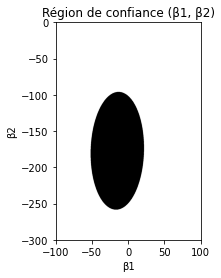

In [7]:
A = np.array([[1,0,0,0], [0,1,0,0]])
AT = np.transpose(A)

# calculons la valeur du quantile
quantile = sps.f.ppf((0.05/2), 2, n-p)

AZ_mult = inv(np.matmul(np.matmul(A, inv(np.matmul(ZT,Z))), AT))

def rc(b1, b2):
    bT = np.array([estimateur_beta[0] - b1, estimateur_beta[1] - b2])
    b = np.transpose(bT)
    return abs((1/(2*estimateur_variance))*np.matmul(bT, np.matmul(AZ_mult, b)))
d1 = np.linspace(-100, 100, 1000)
d2 = np.linspace(-300, 0, 1000)

x,y = np.meshgrid(d1, d2)
rc_vec = np.vectorize(rc)

plt.title("Région de confiance (β1, β2)")
plt.xlabel("β1")
plt.ylabel("β2")
im = plt.imshow((rc_vec(x,y) <= quantile).astype(int), extent=(x.min(), x.max(), y.min(), y.max()), origin="lower", cmap="Greys")

On pose $A = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0
\end{pmatrix}$ une matrice $2 \times p$.

Alors, on calcule la région de confiance pour $(\beta_1, \beta_3)$:
$$ \mathrm{RC}_{\alpha}(\beta_1, \beta_3) = \left\{ \frac{1}{2\hat{\sigma}^2} (\hat{\beta} - \beta)^T [A(Z^TZ)^{-1}A^T]^{-1} (\hat{\beta} - \beta) \leq q_{\frac{\alpha}{2}} \right\} $$
où $q_{\frac{\alpha}{2}}$ est le quantile d'ordre $\frac{\alpha}{2}$ d'une loi de Fisher à $(q, n-p) = (2, n-p)$ degrés de liberté.

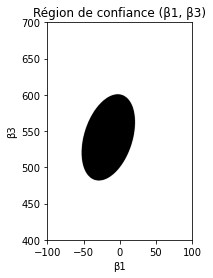

In [8]:
A = np.array([[1,0,0,0], [0,0,1,0]])
AT = np.transpose(A)

# calculons la valeur du quantile
quantile = sps.f.ppf((0.05/2), 2, n-p)

AZ_mult = inv(np.matmul(np.matmul(A, inv(np.matmul(ZT,Z))), AT))

def rc(b1, b2):
    bT = np.array([estimateur_beta[0] - b1, estimateur_beta[2] - b2])
    b = np.transpose(bT)
    return abs((1/(2*estimateur_variance))*np.matmul(bT, np.matmul(AZ_mult, b)))
d1 = np.linspace(-100, 100, 1000)
d2 = np.linspace(400, 700, 1000)

x,y = np.meshgrid(d1, d2)
rc_vec = np.vectorize(rc)

plt.title("Région de confiance (β1, β3)")
plt.xlabel("β1")
plt.ylabel("β3")
im = plt.imshow((rc_vec(x,y) <= quantile).astype(int), extent=(x.min(), x.max(), y.min(), y.max()), origin="lower", cmap="Greys")

<h2 align="center"> <font color='blue'>Exercice 4</font></h2> <a class="anchor" id="P4"></a>

Pour évaluer si $\mathrm{O3}$ est influencée par $\mathrm{Vx}$, on pose $x = (0,1,0,0)$ et le test
$$ H_0: \beta^T x = 0 \quad H_1 : \beta^T \not= 0 $$
analogiquement, pour évaluer si $\mathrm{O3}$ est influencée par $\mathrm{Ne12}$, on pose $x = (0,0,1,0)$ et le test
$$ H_0: \beta^T x = 0 \quad H_1 : \beta^T \not= 0 $$
finalement, pour évaluer si $\mathrm{O3}$ est influencée par $\mathrm{Vx}$ ou $\mathrm{T12}$, on pose $x = (1,1,0,0)$ et le test
$$ H_0: \beta^T x = 0 \quad H_1 : \beta^T \not= 0.$$
Si l'hypothèse $H_0$ est rejeté, on conclue que $\mathrm{O3}$ est influencée. Sinon, $\mathrm{O3}$ n'est pas influencée.

<h2 align="center"> <font color='blue'>Exercice 5</font></h2> <a class="anchor" id="P5"></a>

Notre zone de rejet pour les tests l'exercice précendent est
$$ \mathcal{R}_{\alpha} = (-\infty, -\hat{\sigma}\sqrt{x^T(Z^TZ)^{-1}x}q_{1 - \frac{\alpha}{2}}^{n-p}) \cup  (-\hat{\sigma}\sqrt{x^T(Z^TZ)^{-1}x}q_{\frac{\alpha}{2}}^{n-p}, + \infty)$$

In [9]:
# calculons la valeur des quantiles
quantile_a= quantile = sps.t.ppf(1 - (0.05/2), n-p)
quantile_b= quantile = sps.t.ppf((0.05/2), n-p)

#PREMIER TEST
xT = np.array([0, 1, 0, 0])
x = np.transpose(xT)

statistique_test = np.matmul(np.transpose(estimateur_beta), x) #on calcule Bt x
borne_gauche = -np.sqrt(estimateur_variance)*quantile_a*np.sqrt(np.matmul(xT, np.matmul(inv(np.matmul(ZT, Z)), x)))
borne_droite = -np.sqrt(estimateur_variance)*quantile_b*np.sqrt(np.matmul(xT, np.matmul(inv(np.matmul(ZT, Z)), x)))

if (statistique_test < borne_gauche)or(statistique_test > borne_droite):
    print("Vx est important")#dans la zone de rejet
else:
    print("Vx n'est pas important")#hors la zone de rejet

#SECOND TEST
xT = np.array([0, 0, 1, 0])
x = np.transpose(xT)

statistique_test = np.matmul(xT, estimateur_beta) #on calcule Bt x
borne_gauche = -np.sqrt(estimateur_variance)*quantile_a*np.sqrt(np.matmul(xT, np.matmul(inv(np.matmul(ZT, Z)), x)))
borne_droite = -np.sqrt(estimateur_variance)*quantile_b*np.sqrt(np.matmul(xT, np.matmul(inv(np.matmul(ZT, Z)), x)))

if (statistique_test < borne_gauche)or(statistique_test > borne_droite):
    print("Ne12 est important")#dans la zone de rejet
else:
    print("Ne12 n'est pas important")#hors la zone de rejet

#TROISIEME TEST
xT = np.array([1, 1, 0, 0])
x = np.transpose(xT)

statistique_test = np.matmul(xT, estimateur_beta) #on calcule Bt x
borne_gauche = -np.sqrt(estimateur_variance)*quantile_a*np.sqrt(np.matmul(xT, np.matmul(inv(np.matmul(ZT, Z)), x)))
borne_droite = -np.sqrt(estimateur_variance)*quantile_b*np.sqrt(np.matmul(xT, np.matmul(inv(np.matmul(ZT, Z)), x)))

if (statistique_test < borne_gauche)or(statistique_test > borne_droite):
    print("Vx ou T12 sont important")#dans la zone de rejet
else:
    print("Vx et T12 ne sont pas important")#hors la zone de rejet

Vx n'est pas important
Ne12 est important
Vx et T12 ne sont pas important


<h2 align="center"> <font color='blue'>Exercice 6</font></h2> <a class="anchor" id="P6"></a>

<ul>
  <li> On conclue que O3 n'est pas influencée par Vx </li>
  <li> On conclue que O3 est influencée par Ne12 </li>
  <li> On conclue que O3 n'est pas influencée par Vx et T12 </li>
</ul>